In [1]:
#Nous voulons prédire une variable binaire - que le salaire soit faible ou élevé.
#Calculez le salaire médian et créez une nouvelle variable binaire qui est vraie lorsque le salaire est élevé
#(au-dessus de la médiane)
#Nous pourrions également effectuer une régression linéaire (ou toute régression) pour prédire la valeur du salaire ici.


import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/Users/charleshajjar/Desktop/projet_indeed_charles/clean_salary_charles.csv')

In [3]:
#calcule de la médiane
median = np.median(data.avg)
median

2355.0

In [4]:
data['dumsal'] = (data["avg"] >= data["avg"].median()).astype(int)

In [5]:
data.head()
#data.drop(['Summaries'], axis=1)

,Unnamed: 0,Titre,Company,Summaries,avg,cityfrance,city,dumsal
0,0,Alternance - Data Scientist H/F,Malakoff Humanis,Nous recherchons un business data analyst pass...,1125.0,['Paris (75)'],Paris (75),0
1,1,Data Scientist H/F,CCM Benchmark Group,La réalisation d'analyses de data mining répon...,1500.0,['Asnières-sur-Seine (92)'],Asnières-sur-Seine (92),0
2,4,Alternance - Assistant Data Analyst/PMO H/F,Gandi,"Euro Information, filiale Informatique du grou...",1125.0,['Paris (75)'],Paris (75),0
3,5,Développeur confirmé H/F,VONA,Business Developer – Stage de fin d’études – J...,800.0,['Levallois-Perret (92)'],Levallois-Perret (92),0
4,6,Data Analyst·(e) - Stagiaire H/F,Joko,Stagiaire data analyst(e) h/f ou similaire: 1 ...,3150.0,['Paris 9e (75)'],Paris 9e (75),1


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
cvec = CountVectorizer()
X = data["Titre"]
y = data["dumsal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [8]:
#La gestion des fréquences, sélection des mots pertinents, élimination des stopwords
cvec = CountVectorizer(stop_words='english').fit(X_train)
df_train = pd.DataFrame(cvec.transform(X_train).todense(),
             columns=cvec.get_feature_names())

In [9]:
df_test = pd.DataFrame(cvec.transform(X_test).todense(),
                      columns=cvec.get_feature_names())
print(df_train.shape)
print(y_train.shape)
print(df_test.shape)
print(y_test.shape)

(192, 155)
(192,)
(95, 155)
(95,)


In [10]:
df_train.head(5)

,2020,67,68,affaires,agile,alfresco,alternance,alternant,analyst,analyste,...,technique,testeur,trader,travail,télé,télécom,web,webmarketeur,éditique,études
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_train.columns

Index(['2020', '67', '68', 'affaires', 'agile', 'alfresco', 'alternance',
       'alternant', 'analyst', 'analyste',
       ...
       'technique', 'testeur', 'trader', 'travail', 'télé', 'télécom', 'web',
       'webmarketeur', 'éditique', 'études'],
      dtype='object', length=155)

In [12]:
lr = LogisticRegression()
lr.fit(df_train, y_train)
lr.score(df_test, y_test)

0.4842105263157895

In [13]:
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(lr, df_test, y_test, cv=6)
print("Cross-validated scores:", scores)
# Make cross validated predictions
predictions = cross_val_predict(lr, df_test, y_test, cv=6)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-validated scores: [0.4375     0.6875     0.6875     0.6875     0.5625     0.46666667]
Cross-Predicted Accuracy: 0.5894736842105263


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
RF = rf.fit(df_train,y_train)
s = cross_val_score(rf, df_train, y_train, n_jobs=-1)
print ("{} Score:\t{:0.3} ± {:0.3}".format("Random Forrest", s.mean().round(3), s.std().round(3)))

Random Forrest Score:	0.454 ± 0.08


In [15]:
rf_features = pd.DataFrame(RF.feature_importances_,
                                   index = df_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
rf_features.head(10)

,importance
data,0.031461
business,0.030842
développeur,0.029203
java,0.026910
php,0.025470
consultant,0.023118
alternance,0.021206
analyst,0.019871
informatique,0.019092
stack,0.019072


In [16]:
#créé des colone par titre de travaille 
dummys= pd.get_dummies(data['Titre'])
dummys.head(5)

,(ALTERNANCE) Développeur Frontend - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Java - Chez l’un de nos partenaires,(ALTERNANCE) Développeur PHP/Symfony - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Python - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Web - Chez l’un de nos partenaires,ALSA EMS - Alternance/Stage - Data Intelligence Specialist H/F,ANALYSTE CONTRÔLE QUALITÉ CODE SOURCE (H/F),ANALYSTE CONTRÔLE QUALITÉ CODE SOURCE F/H,ATTACHE COMMERCIAL – SUD-EST H/F,Alternance - Assistant Data Analyst/PMO H/F,...,Responsable de centre de profit en création (H/F),Senior Business Analyst H/F,Stage - Data Analyst (F/H),Stagiaire Data Scientist,Stagiaire Data Scientist – Economic Advisory (H/F),Stagiaire Opinion Data Analyst,Technico-Commercial h/f,UN ALTERNANT – DATA ANALYST (H/F),Un développeur Java JEE/Angular sur Nancy / Freelance,Webmarketeur – Développeur multimédia h/f - Alternance
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [18]:
dummys_city= pd.get_dummies(data['city'])
dummys_city.head(5)
data= pd.concat([data,dummys], axis=1)
data.head(5)
data= pd.concat([data,dummys_city], axis=1)
data.drop(columns = ['Unnamed: 0', 'Titre','Company','cityfrance','city'], inplace = True)
data.drop(columns = ['Summaries'], inplace = True)
data.head(5)


,avg,dumsal,(ALTERNANCE) Développeur Frontend - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Java - Chez l’un de nos partenaires,(ALTERNANCE) Développeur PHP/Symfony - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Python - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Web - Chez l’un de nos partenaires,ALSA EMS - Alternance/Stage - Data Intelligence Specialist H/F,ANALYSTE CONTRÔLE QUALITÉ CODE SOURCE (H/F),ANALYSTE CONTRÔLE QUALITÉ CODE SOURCE F/H,...,Mérignac (33),Nancy (54),Noisy-le-Sec (93),Paris (75),Paris 18e (75),Paris 2e (75),Paris 9e (75),Rueil-Malmaison (92),Tassin-la-Demi-Lune (69),Île-de-France
0,1125.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1500.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1125.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,800.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3150.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
y=data['avg']
X=data.drop(['avg'], axis=1)
#X= pd.get_dummies(X.select_dtypes('object'))
#X1 = X.select_dtypes(exclude = 'object')
#X = pd.concat([X1, X], axis=1, join='inner')


In [20]:
X.head(5)
y.head(5)

0    1125.0
1    1500.0
2    1125.0
3     800.0
4    3150.0
Name: avg, dtype: float64

In [21]:
# Train - Test split
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size  = 0.25)

In [22]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
regressor = xgb.XGBRegressor(
    n_estimators=123,
    reg_lambda=1,
    gamma=0,
    max_depth=1000000
)

In [24]:
regressor.fit(train_data, train_label)

[16:19:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1000000, min_child_weight=1, missing=None,
             n_estimators=123, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [25]:
pd.DataFrame(regressor.feature_importances_.reshape(1, -1))

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,162
0,0.495526,0.004246,0.003803,0.002936,0.000508,0.003128,0.002132,0.0,0.000011,0.0,...,0.020602,0.002195,0.0,0.002993,0.000386,0.002477,0.000182,0.0,0.0,0.0


In [26]:
y_pred = regressor.predict(test_data)

In [27]:
mean_squared_error(test_label, y_pred)

234359.37486485453

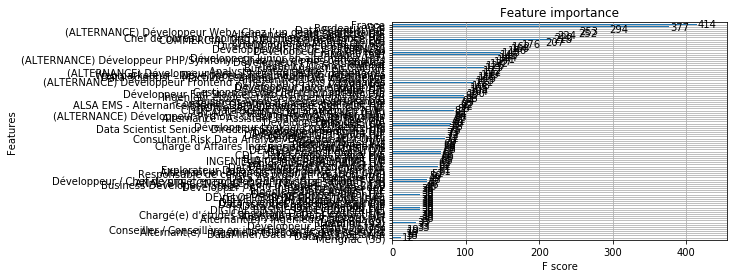

In [28]:
xgb.plot_importance(regressor)


In [29]:
print(y_pred,test_label)

[2656.8972 3200.7368 2703.2852 2099.9883 3334.9644 1870.7589 1815.6432
 2354.8938 2099.9883 2455.1611 3163.631  3396.7715 3123.8777 3396.7715
 2379.673  2099.8955 2099.993  2285.384  2942.6194 2099.993  3163.631
 2099.993  2994.8706 3163.631  2385.4207 3163.631  2656.8972 2354.9817
 2099.993  1815.6432 3163.631  2099.993  2770.081  2099.993  2099.993
 3349.4673 2099.993  3228.4653 1994.5125 2772.9353 2099.993  2099.993
 2354.8552 2099.993  2703.2852 3163.631  2152.2212 3396.0503 2354.9917
 3391.159  2099.9883 1940.5474 3734.6274 3163.631  2354.9944 3163.631
 3163.631  3228.4653 2379.673  2977.482  3163.631  2099.9883 2354.9817
 2099.993  3562.5962 2099.993  3245.646  3381.8328 2098.025  2850.3408
 2099.993  2354.9893] 61     2355.0
218    2850.0
174    2355.0
193    2100.0
62     2355.0
        ...  
260    2355.0
1      1500.0
259    2850.0
121    2100.0
240    2355.0
Name: avg, Length: 72, dtype: float64


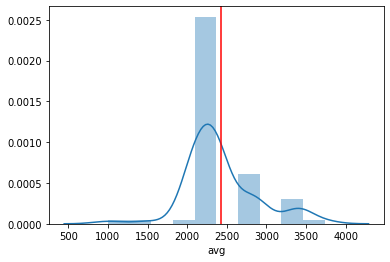

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(test_label, bins=10)
ax.axvline(test_label.mean(), c='r')


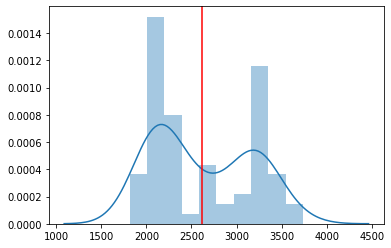

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(y_pred, bins=10)
ax.axvline(y_pred.mean(), c='r')


In [32]:

# Normalization
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  

# Applying same transformation to test data
test_data = scaler.transform(test_data)

In [33]:
# Simple example for beginers how to adress ""
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils


In [34]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(train_data, train_label)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(train_data)
rmse = (np.sqrt(mean_squared_error(train_label, y_train_predict)))
r2 = r2_score(train_label, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 289.01506247341655
le score R2 est 0.7980247177917001




In [36]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [37]:
data


,avg,dumsal,(ALTERNANCE) Développeur Frontend - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Java - Chez l’un de nos partenaires,(ALTERNANCE) Développeur PHP/Symfony - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Python - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Web - Chez l’un de nos partenaires,ALSA EMS - Alternance/Stage - Data Intelligence Specialist H/F,ANALYSTE CONTRÔLE QUALITÉ CODE SOURCE (H/F),ANALYSTE CONTRÔLE QUALITÉ CODE SOURCE F/H,...,Mérignac (33),Nancy (54),Noisy-le-Sec (93),Paris (75),Paris 18e (75),Paris 2e (75),Paris 9e (75),Rueil-Malmaison (92),Tassin-la-Demi-Lune (69),Île-de-France
0,1125.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1500.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1125.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,800.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3150.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2100.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,3400.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284,2850.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,2355.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#teste de model de classification

data2 = pd.read_csv('/Users/charleshajjar/Desktop/projet_indeed_charles/clean_salary_charles.csv')

In [39]:
data2['dumsal'] = (data2["avg"] >= data2["avg"].median()).astype(int)

In [40]:
data2.head()

,Unnamed: 0,Titre,Company,Summaries,avg,cityfrance,city,dumsal
0,0,Alternance - Data Scientist H/F,Malakoff Humanis,Nous recherchons un business data analyst pass...,1125.0,['Paris (75)'],Paris (75),0
1,1,Data Scientist H/F,CCM Benchmark Group,La réalisation d'analyses de data mining répon...,1500.0,['Asnières-sur-Seine (92)'],Asnières-sur-Seine (92),0
2,4,Alternance - Assistant Data Analyst/PMO H/F,Gandi,"Euro Information, filiale Informatique du grou...",1125.0,['Paris (75)'],Paris (75),0
3,5,Développeur confirmé H/F,VONA,Business Developer – Stage de fin d’études – J...,800.0,['Levallois-Perret (92)'],Levallois-Perret (92),0
4,6,Data Analyst·(e) - Stagiaire H/F,Joko,Stagiaire data analyst(e) h/f ou similaire: 1 ...,3150.0,['Paris 9e (75)'],Paris 9e (75),1


In [41]:
data2 = data2[data2.city != 'France']

In [42]:
data2.shape

(200, 8)

In [43]:
y1=data2['city']

X1=data2.drop(['cityfrance','city',],axis=1)


In [44]:
X1=X1.drop(['Summaries','Company','Titre'],axis=1)


In [45]:
X1=X1.drop(['Unnamed: 0'],axis=1)

In [46]:
X1

,avg,dumsal
0,1125.0,0
1,1500.0,0
2,1125.0,0
3,800.0,0
4,3150.0,1
...,...,...
273,2600.0,1
277,2355.0,1
280,2850.0,1
283,3400.0,1


In [47]:
# fit model no training data
model = XGBClassifier()
model.fit(X1, y1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

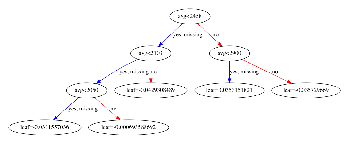

In [48]:
# plot single tree
plot_tree(model, num_trees=100)
plt.show()

In [49]:
train_X, test_X, train_y, test_y = train_test_split(X1, y1, test_size  = 0.25)

In [50]:
from sklearn.ensemble import RandomForestClassifier
regressore = RandomForestClassifier (n_estimators = 10,criterion='entropy', random_state = 0)
regressore.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
y_pred=regressore.predict(test_X)

In [52]:
regressore.score(test_X,test_y)

0.26

In [53]:
print(test_y,y_pred)

3            Levallois-Perret (92)
153       Tassin-la-Demi-Lune (69)
227                      Metz (57)
185                  Bordeaux (33)
68                      Nancy (54)
225                      Metz (57)
27                   Paris 2e (75)
162       Tassin-la-Demi-Lune (69)
70                      Nancy (54)
23                      Paris (75)
273                      Metz (57)
283                      Metz (57)
21                      Paris (75)
113       Tassin-la-Demi-Lune (69)
86                      Nancy (54)
31               Noisy-le-Sec (93)
219                  Bordeaux (33)
42           Levallois-Perret (92)
172                  Bordeaux (33)
108                   Lyon 9e (69)
201                  Bordeaux (33)
167                  Mérignac (33)
198                  Bordeaux (33)
28            Rueil-Malmaison (92)
194                  Bordeaux (33)
14           Levallois-Perret (92)
199                  Bordeaux (33)
195                  Bordeaux (33)
221                 

In [54]:
test_X

,avg,dumsal
3,800.0,0
153,2100.0,0
227,2100.0,0
185,2100.0,0
68,2355.0,1
225,2850.0,1
27,2106.0,0
162,2567.5,1
70,2355.0,1
23,3736.0,1


In [55]:
# on voit que sur la classification des villes le resultat est tres 
#mauvais du fait que sur notre dataset il ya beaucoup de ville
#inconny portant le nom de france et comportant des salire differente ce qui fausse notre prediction
#le but étant de predire grace au salaire la ville de l'employeur. 